# Identification
In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.



In [29]:
# Import modules





In [30]:
# Load in the time series


,savings
date,
1955-01-01,4.9
1955-04-01,5.2
1955-07-01,5.7
1955-10-01,5.7
1956-01-01,6.2
...,...
1979-04-01,5.0
1979-07-01,4.8
1979-10-01,4.7


1. Plot the time series using the DataFrame's .plot() method.
2. Apply the Dicky-Fuller test to the 'savings' column of the savings DataFrame and assign the test outcome to result.
3. Print the Dicky-Fuller test statistics and the associated p-value.

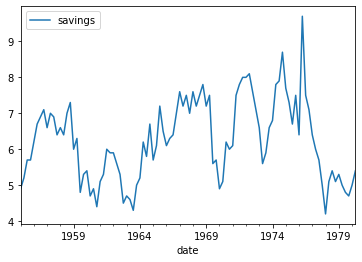

-3.185899096242139
0.02081554164411422


In [8]:
# Plot time series


# Run Dicky-Fuller test


# Print test statistic


# Print p-value


# Identification II
You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

The plot_acf() and the plot_pacf() functions have been imported and the time series has been loaded into the DataFrame savings.

1. Make a plot of the ACF, for lags 1-10 and plot it on axis ax1.
2. Do the same for the PACF.

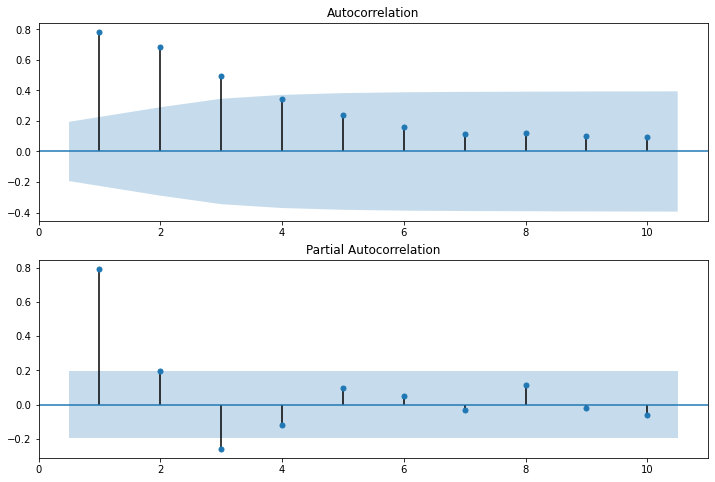

In [14]:
# Create figure

 
# Plot the ACF of savings on ax1


# Plot the PACF of savings on ax2


# Estimation
In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

The time series savings has been loaded and the SARIMAX class has been imported into your environment.

1. Loop over values of from 0 to 3 and values of q from 0 to 3.
2. Inside the loop create an ARMA(p,q) model with a constant trend.
3. Then fit the model to the time series savings.
4. At the end of each loop print the values of p and q and the AIC and BIC.

In [37]:
## Searching over model order

# Create empty list to store search results


# Loop over p values from 0-2

  # Loop over q values from 0-2

      	# create and fit ARMA(p,q) model
    
        # Append order and results tuple

        
# We built 9 models in just a few seconds! 
# In the next exercise you will evaluate the results to choose the best model.

C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, Valu

In [20]:
## Choosing order with AIC and BIC

#Construct DataFrame from order_aic_bic


# Print order_df in order of increasing AIC


# Print order_df in order of increasing BIC


   p  q         AIC         BIC
5  1  2  207.652986  220.777850
8  2  2  209.579034  225.328871
7  2  1  213.430357  226.555221
6  2  0  213.972323  224.472215
4  1  1  215.700390  226.200281
3  1  0  216.203481  224.078399
2  0  2  232.167827  242.667718
1  0  1  267.069710  274.944628
0  0  0  313.602866  318.852811
   p  q         AIC         BIC
5  1  2  207.652986  220.777850
3  1  0  216.203481  224.078399
6  2  0  213.972323  224.472215
8  2  2  209.579034  225.328871
4  1  1  215.700390  226.200281
7  2  1  213.430357  226.555221
2  0  2  232.167827  242.667718
1  0  1  267.069710  274.944628
0  0  0  313.602866  318.852811


# Diagnostics
You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

The time series savings has been loaded and the SARIMAX class has been imported into your environment.

1. Retrain the ARMA(1,2) model on the time series, setting the trend to constant.
2. Create the 4 standard diagnostics plots.
3. Print the model residual summary statistics.

C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\kaill\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


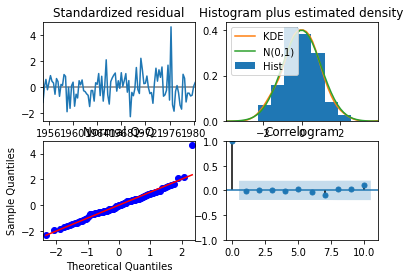

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Sun, 12 Apr 2020   AIC                            207.653
Time:                        07:54:04   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

In [39]:
# Create and fit model


# Create the 4 diagostics plots


# Print summary
